FIAP - Tecnólogo de Inteligência Artificial


# Machine Learning & Modelling - Checkpoint #2 e Checkpoint #3 

Faça _individualmente_ a lista abaixo para praticar análise descritiva, gráficos e regressão linear. Utilize os conceitos vistos em sala, os notebooks disponíveis e consulte documentações de Python na Internet. Em caso de dúvidas, contate o Prof. Michel. 

**Entrega**: 26/maio/2022, via Teams - IMPORTANTE: renomeie o notebook incluindo seu nome! 



## Dataset

O dataset mapeia características de pessoas cruzando com o valor pago pelo seu seguro de saúde nos EUA. Os dados são compostos pelas seguintes variáveis: 

- `age` : idade do indivíduo 
- `sex` : sexo do indivíduo 
- `bmi` : "Body mass index", o IMC (índice de massa corporal)
- `children` : número de filhos
- `smoker` : fumante ou não?
- `region` : região de residência da pessoa
- `charges` : tarifa paga pela pessoa

Os dados podem ser lidos diretamente a partir desta URL: https://tinyurl.com/42rvaw4p


## Atividades 

A partir da leitura do dataset, realize as seguintes tarefas: 

### Gerais (CK #2)

1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset 

### Gráficos (CK #2)

Lembrem-se! Todo gráfico precisa ter um título, o nome do Eixo X e do Eixo Y! Estas alterações nos gráficos são **obrigatórias**. Outras alterações de layout são bem-vindas, e podem gerar nota extra ;D

2. Faça um histograma com as idades das pessoas
3. Faça uma gráfico com a distribuição das pessoas por sexo
4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto 
5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável "sex"
6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro _hue_ ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões? 


### Filtros de dataframes (CK #3)

7. Faça um dataframe menor selecionamento apenas selecionando as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc. 
8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes


### Regressão linear (CK #3)

9. Padronize as features do dataset 
10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

In [1]:
import pandas
import seaborn
from matplotlib import pyplot
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
dataframe = pandas.read_csv("https://tinyurl.com/42rvaw4p")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## 1. Faça uma análise descritiva geral dos dados, para se familirizar com o dataset

In [3]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
dataframe.sample(5)

,age,sex,bmi,children,smoker,region,charges
658,48,female,35.910,1,no,northeast,26392.26029
1144,50,male,32.300,2,no,southwest,9630.39700
1271,25,female,34.485,0,no,northwest,3021.80915
844,53,male,30.495,0,no,northeast,10072.05505
827,36,male,28.025,1,yes,northeast,20773.62775


In [5]:
dataframe.nunique().sort_values()

sex            2
smoker         2
region         4
children       6
age           47
bmi          548
charges     1337
dtype: int64

In [6]:
dataframe["sex"].unique()

array(['female', 'male'], dtype=object)

In [7]:
dataframe["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [8]:
dataframe["smoker"].unique()

array(['yes', 'no'], dtype=object)

In [9]:
by_sex = dataframe.groupby("sex")
by_sex.mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [10]:
by_smoker = dataframe.groupby("smoker")
by_smoker.mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [11]:
by_region = dataframe.groupby("region")
by_region.mean().sort_values(by="charges", ascending=False)

,age,bmi,children,charges
region,,,,
southeast,38.939560,33.355989,1.049451,14735.411438
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southwest,39.455385,30.596615,1.141538,12346.937377


In [12]:
by_children = dataframe.groupby("children")
by_children.mean().sort_values("charges", ascending=False)

,age,bmi,charges
children,,,
3,41.566879,30.684331,15355.318367
2,39.445833,30.978104,15073.563734
4,39.000000,31.391200,13850.656311
1,39.453704,30.623148,12731.171832
0,38.444251,30.550296,12365.975602
5,35.611111,29.605000,8786.035247


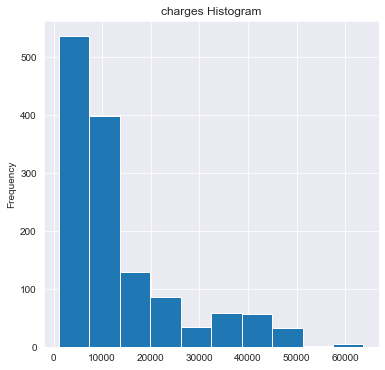

In [13]:
dataframe["charges"].plot.hist(title="charges Histogram", figsize=(6, 6));

## 2. Faça um histograma com as idades das pessoas

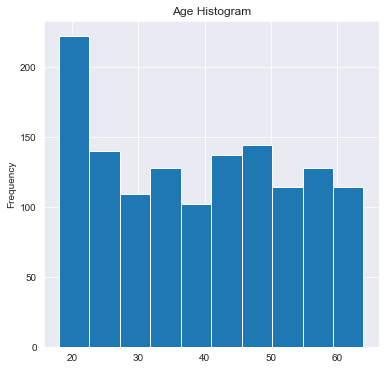

In [14]:
dataframe["age"].plot.hist(title="Age Histogram", figsize=(6, 6));

## 3. Faça uma gráfico com a distribuição das pessoas por sexo

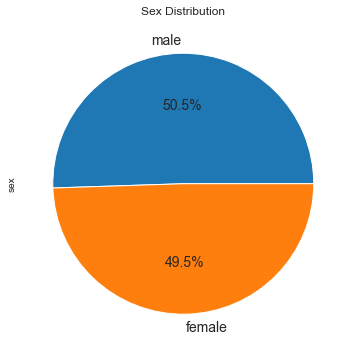

In [15]:
(dataframe["sex"].value_counts()
 .plot.pie(title="Sex Distribution", autopct='%1.1f%%', fontsize=14, figsize=(6, 6)));

## 4. Faça um boxplot de gastos por região. Cada região deve estar em um boxplot distinto

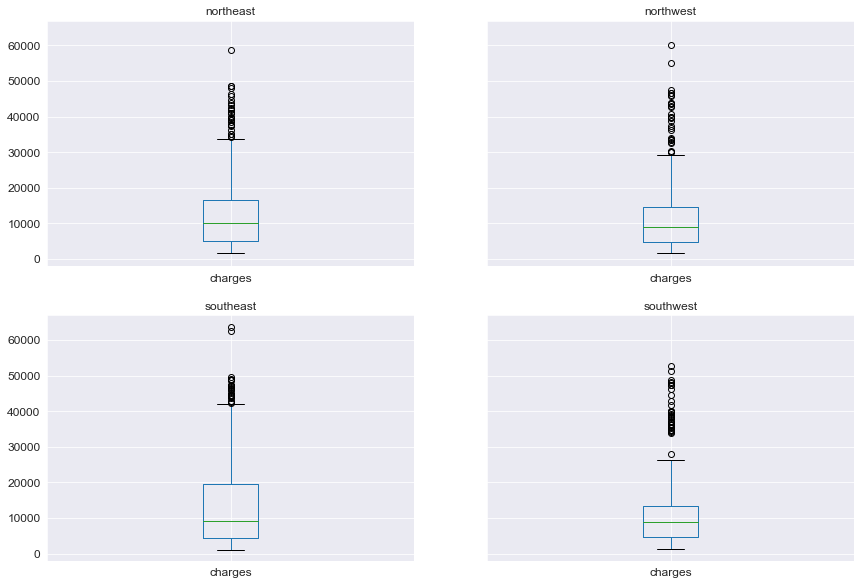

In [16]:
dataframe[["region", "charges"]].groupby("region").boxplot(figsize=(14, 10), fontsize=12);

### 5. Faça um gráfico de dispersão (scatter plot) de BMI (eixo X) e Charges (eixo Y). Defina a cor dos pontos pela variável “sex”

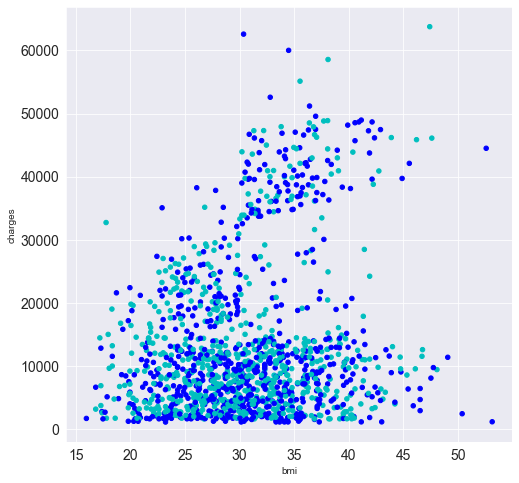

In [17]:
sex_color = dataframe["sex"].map({"male": "b", "female": "c"})
dataframe.plot.scatter(x="bmi", y="charges", c=sex_color, colormap='viridis', figsize=(8, 8), fontsize=14);

### 6. Faça um pairplot (da biblioteca seaborn) de todas as variáveis. Defina a cor (parâmetro hue ) em função da variável smoker. Observando especialmente os gráficos da linha ou coluna das tarifas (charges), quais são suas principais conclusões?

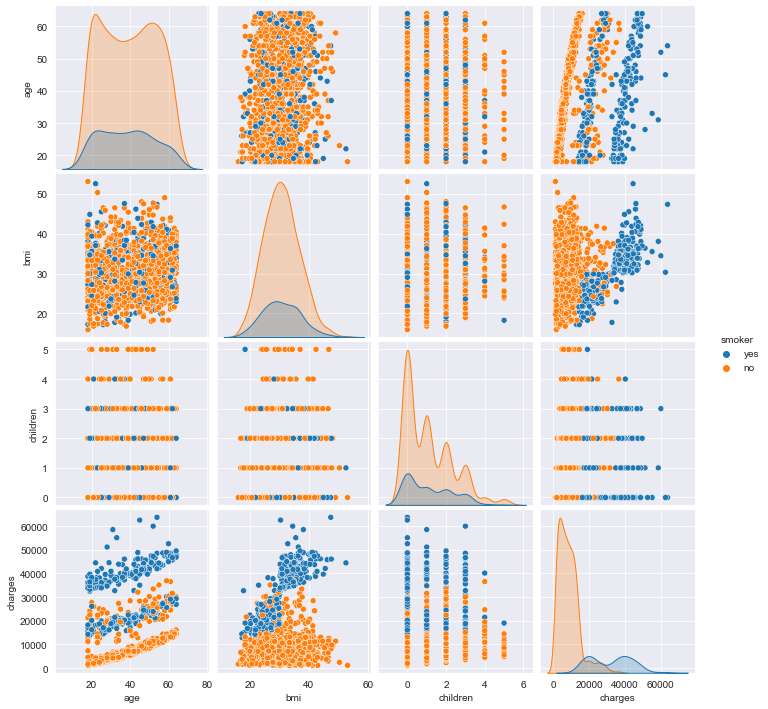

In [18]:
seaborn.pairplot(dataframe, hue="smoker");

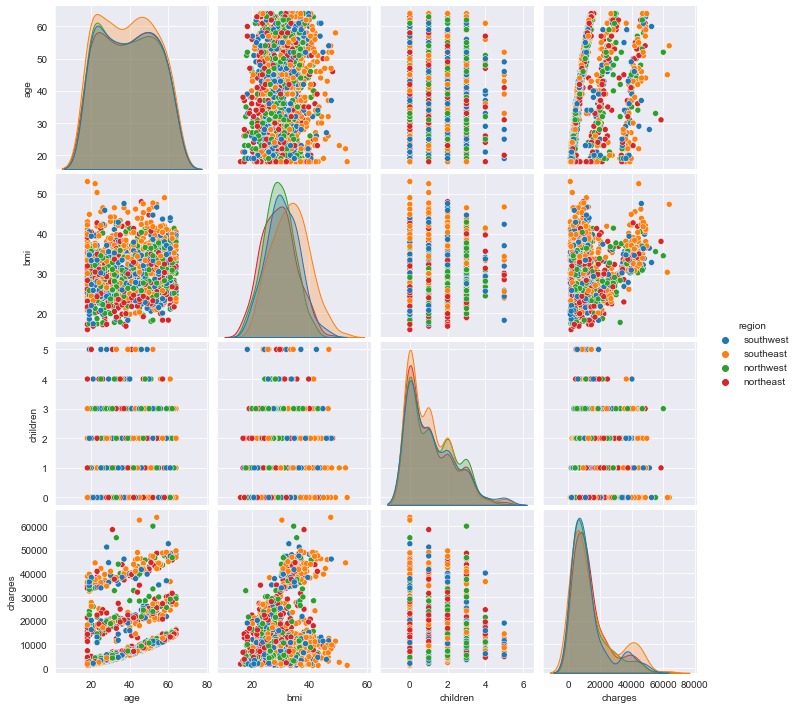

In [19]:
seaborn.pairplot(dataframe, hue="region");

## 7. Faça um dataframe menor selecionando apenas as pessoas que pagam acima do valor médio da tarifa. Descreva o perfil destas pessoas em termos de suas variáveis: ou seja, possuem quantos filhos? qual a idade média? são geralmente os homens ou as mulheres? etc.

No histograma de filhos podemos ver que a maioria (moda) da base não tem filhos, e no maximo tem 5 filhos (sendo muitos poucos). Da base a idade media é 44,4 anos, a idade minima é de 18 e maxima de 64 anos. Também podemos ver que a distribuição em comparação com a mostra total continua muito similar, tem uma boa distribuição entre homens e mulheres.

Comparado com a mostra total, agora vemos uma melhor distruibuição entre fumantes e não fumantes.

In [20]:
mean_charge = dataframe["charges"].mean()
print(f"Mean charge: {round(mean_charge, 2)} \n")

Mean charge: 13270.42 



In [21]:
charges_above_mean = dataframe.query(f"charges > {mean_charge}")
charges_above_mean.sample(5)

,age,sex,bmi,children,smoker,region,charges
550,63,male,30.80,0,no,southwest,13390.5590
1047,22,male,52.58,1,yes,southeast,44501.3982
338,50,male,32.30,1,yes,northeast,41919.0970
909,32,female,24.60,0,yes,southwest,17496.3060
435,60,male,33.11,3,no,southeast,13919.8229


In [22]:
charges_above_mean["children"].describe()

count    420.000000
mean       1.138095
std        1.202613
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: children, dtype: float64

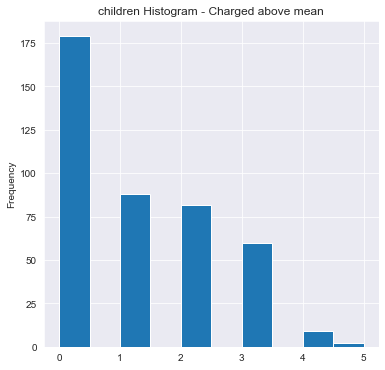

In [23]:
charges_above_mean["children"].plot.hist(title="children Histogram - Charged above mean", figsize=(6, 6));

In [24]:
charges_above_mean["age"].describe()

count    420.000000
mean      42.464286
std       15.244582
min       18.000000
25%       29.000000
50%       43.000000
75%       57.000000
max       64.000000
Name: age, dtype: float64

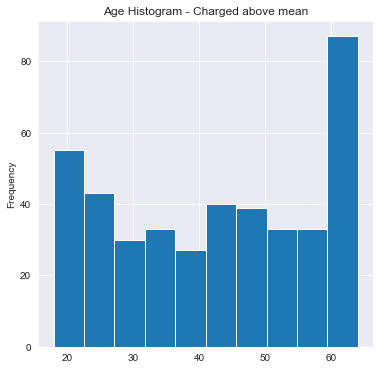

In [25]:
charges_above_mean["age"].plot.hist(title="Age Histogram - Charged above mean", figsize=(6, 6));

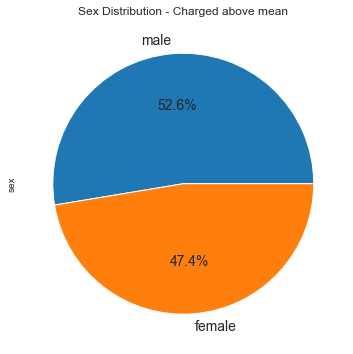

In [26]:
(charges_above_mean["sex"].value_counts()
 .plot.pie(title="Sex Distribution - Charged above mean", autopct='%1.1f%%', fontsize=14, figsize=(6, 6)));

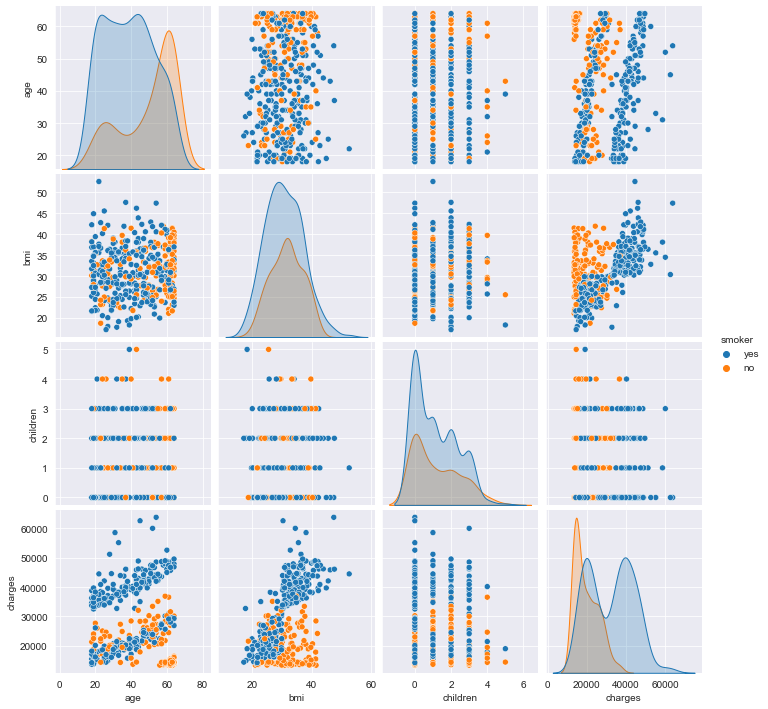

In [27]:
seaborn.pairplot(charges_above_mean, hue="smoker");

## 8. Verifique quantas pessoas existem abaixo dos 30 anos E que são fumantes

86 pessoas correspondem a essa condição, comparado com as pessoas da mesma idade que não são fumantes (89,4%), são poucas

In [28]:
smokers_under_30 = dataframe.query("age < 30 and smoker == 'yes'")
smokers_under_30.sample(5)

,age,sex,bmi,children,smoker,region,charges
604,19,female,28.310,0,yes,northwest,17468.98390
1021,22,female,31.020,3,yes,southeast,35595.58980
380,27,female,17.955,2,yes,northeast,15006.57945
1231,20,female,21.800,0,yes,southwest,20167.33603
1184,23,female,28.490,1,yes,southeast,18328.23810


In [29]:
smokers_under_30.describe()

,age,bmi,children,charges
count,86.000000,86.000000,86.000000,86.000000
mean,22.337209,30.433663,0.744186,27518.035262
std,3.651303,6.665645,1.064795,10359.842952
min,18.000000,17.195000,0.000000,12829.455100
25%,19.000000,26.895000,0.000000,17082.126900
50%,22.000000,30.225000,0.000000,33604.251925
75%,25.000000,34.625000,1.000000,36143.256050
max,29.000000,52.580000,4.000000,51194.559140


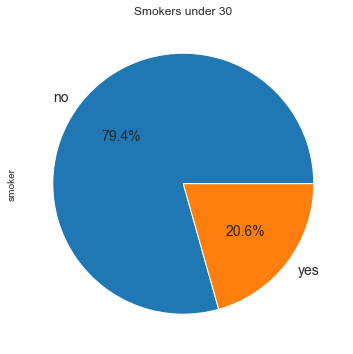

In [30]:
dataframe.query("age < 30")["smoker"].value_counts().plot.pie(title="Smokers under 30", autopct='%1.1f%%', fontsize=14,
                                                              figsize=(6, 6));

## 9. Padronize as features do dataset

In [31]:
dataframe.sample(5)

,age,sex,bmi,children,smoker,region,charges
123,44,male,31.350,1,yes,northeast,39556.49450
1007,47,male,28.215,3,yes,northwest,24915.22085
511,27,male,33.660,0,no,southeast,2498.41440
271,50,male,34.200,2,yes,southwest,42856.83800
332,61,female,31.160,0,no,northwest,13429.03540


In [32]:
training_df = dataframe.copy()

In [33]:
region_dummies = pandas.get_dummies(training_df["region"])
region_dummies.sample(5)

,northeast,northwest,southeast,southwest
1075,0,0,1,0
1113,0,1,0,0
200,0,1,0,0
579,1,0,0,0
384,1,0,0,0


In [34]:
training_df = pandas.concat([dataframe.drop(["region"], axis=1), region_dummies], axis=1)
training_df.sample(5)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
64,20,female,22.420,0,yes,14711.74380,0,1,0,0
674,44,female,43.890,2,yes,46200.98510,0,0,1,0
180,58,male,28.595,0,no,11735.87905,0,1,0,0
558,35,female,34.105,3,yes,39983.42595,0,1,0,0
1259,52,female,23.180,0,no,10197.77220,1,0,0,0


In [35]:
def sex_scaler(e):
    if e == "male":
        return 1
    if e == "female":
        return 0
    return e


training_df["sex"] = dataframe["sex"].apply(sex_scaler)
training_df.sample(5)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
147,51,0,37.73,1,no,9877.60770,0,0,1,0
253,27,1,30.30,3,no,4260.74400,0,0,0,1
1250,24,1,29.83,0,yes,18648.42170,1,0,0,0
418,64,1,39.16,1,no,14418.28040,0,0,1,0
573,62,0,36.86,1,no,31620.00106,1,0,0,0


In [36]:
def smoker_scaler(e):
    if e == "yes":
        return 1
    if e == "no":
        return 0
    return e


training_df["smoker"] = dataframe["smoker"].apply(smoker_scaler)
training_df.sample(5)

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
1167,29,0,24.600,2,0,4529.47700,0,0,0,1
17,23,1,23.845,0,0,2395.17155,1,0,0,0
49,36,1,35.200,1,1,38709.17600,0,0,1,0
838,35,0,23.465,2,0,6402.29135,1,0,0,0
874,44,1,21.850,3,0,8891.13950,1,0,0,0


In [37]:
x = training_df.drop(["charges"], axis=1)
y = training_df["charges"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

x_train.sample(5)

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest
1002,24,1,25.800,0,0,0,0,0,1
560,46,0,19.950,2,0,0,1,0,0
435,60,1,33.110,3,0,0,0,1,0
602,56,0,25.300,0,0,0,0,0,1
444,56,1,26.695,1,1,0,1,0,0


In [38]:
std_scaler = StandardScaler()

x_train_std = std_scaler.fit_transform(x_train)
x_test_std = std_scaler.transform(x_test)

In [39]:
minmax_scaler = MinMaxScaler()

x_train_mima = minmax_scaler.fit_transform(x_train)
x_test_mima = minmax_scaler.transform(x_test)

### 10. Execute uma regressão linear simples usando todas as features (o label é o valor pago do seguro). Calcule o `R2 score` e interprete o valor desta métrica

Tres predições foram feitas, uma sem scaler, outra com MinMaxScaler e uma ultima com StandardScaler. Nos 3 resultados o R2 score teve um valor similar, proximo a 0.7. Ainda não é uma metrica muito boa e o ideal é experimentar com outros modelos.

In [40]:
def build_linear_regression(x_train, x_test, y_train, y_test):
    model = LinearRegression()

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    print("R2 Score", round(metrics.r2_score(y_test, y_pred), 4))
    # print(pandas.DataFrame({"real": y_test, "pred": y_pred}).sample(5))

    pyplot.scatter(y_test, y_pred, c="c", alpha=0.5)

R2 Score 0.6953


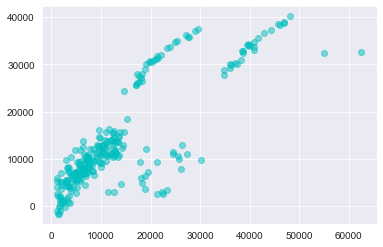

In [41]:
build_linear_regression(x_train, x_test, y_train, y_test)

R2 Score 0.6954


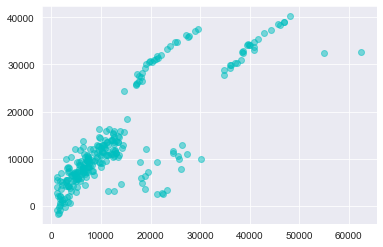

In [42]:
build_linear_regression(x_train_mima, x_test_mima, y_train, y_test)

R2 Score 0.6953


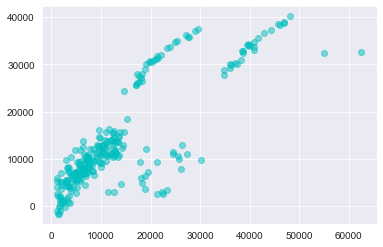

In [43]:
build_linear_regression(x_train_std, x_test_std, y_train, y_test)